

COVID-19 for Data Analysis Project

The Dataset is obtained from Kaggle at the following link: https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students

COVID-19 is a global pandemic caused by the coronavirus, It presents unique challenges for data analysis.


Educational Disruption: Many schools and universities shifted to remote learning, affecting the quality and accessibility of education. This sudden change disrupted traditional teaching methods and learning experiences.

Social and Emotional Impact: The lack of in-person interaction and extracurricular activities led to increased feelings of isolation and stress among students.

This project involves analyzing a dataset of student responses regarding their experiences during the COVID-19 pandemic

Group Member: (X00178358 David Chen) (X

Imports

** Import pandas, numpy, matplotlib,and seaborn. **

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the Covid-19 dataset csv file

In [11]:
df = pd.read_csv('COVID-19 Survey Student Responses.csv')

In [ ]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


## Data Cleaning




A Graph show time spent on tv and social media platform

In [ ]:
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], errors='coerce')
median_tv_time = df['Time spent on TV'].median()
df['Time spent on TV'].fillna(median_tv_time, inplace=True)
df['Prefered social media platform'] = df['Prefered social media platform'].str.lower()
df[['Time spent on TV', 'Prefered social media platform']].head()



,Time spent on TV,Prefered social media platform
0,1.0,linkedin
1,0.0,youtube
2,0.0,linkedin
3,0.0,instagram
4,1.0,instagram


Remove Duplicate Rows

In [ ]:
df = df.drop_duplicates()

 Convert all text to lowercase for 'Prefered social media platform' column

In [ ]:
df['Prefered social media platform'] = df['Prefered social media platform'].str.lower()

Convert 'Yes'/'No' answers to boolean for 'Health issue during lockdown'

In [ ]:
df['Health issue during lockdown'] = df['Health issue during lockdown'].map({'YES': 1, 'NO': 0})

Replace missing values in 'Time spent on Online Class' with the mean

In [ ]:
df['Time spent on Online Class'] = df['Time spent on Online Class'].fillna(df['Time spent on Online Class'].mean())

Correct non-numeric values in 'Time spent on TV'

In [ ]:
df['Time spent on TV'] = pd.to_numeric(df['Time spent on TV'], errors='coerce')
df['Time spent on TV'] = df['Time spent on TV'].fillna(df['Time spent on TV'].median())

Trim whitespace from all string columns

In [ ]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

Rename columns to replace spaces with underscores and lowercase

In [ ]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

Convert ratings to ordinal scale

In [ ]:
ratings_scale = {'Very poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5}
df['rating_of_online_class_experience'] = df['rating_of_online_class_experience'].map(ratings_scale)

Fill missing values in 'Time spent on self study' with median

In [ ]:
df['time_spent_on_self_study'] = df['time_spent_on_self_study'].fillna(df['time_spent_on_self_study'].median())

Display the cleaned DataFrame

In [ ]:
df.head()

,id,region_of_residence,age_of_subject,time_spent_on_online_class,rating_of_online_class_experience,medium_for_online_class,time_spent_on_self_study,time_spent_on_fitness,time_spent_on_sleep,time_spent_on_social_media,prefered_social_media_platform,time_spent_on_tv,number_of_meals_per_day,change_in_your_weight,health_issue_during_lockdown,stress_busters,time_utilized,"do_you_find_yourself_more_connected_with_your_family,_close_friends_,_relatives__?",what_you_miss_the_most
0,R1,Delhi-NCR,21,2.0,4.0,Laptop/Desktop,4.0,0.0,7.0,3.0,linkedin,1.0,4,Increased,0,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,5.0,Smartphone,0.0,2.0,10.0,3.0,youtube,0.0,3,Decreased,0,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,1.0,Laptop/Desktop,3.0,0.0,6.0,2.0,linkedin,0.0,3,Remain Constant,0,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,1.0,Smartphone,2.0,1.0,6.0,5.0,instagram,0.0,3,Decreased,0,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,4.0,Laptop/Desktop,3.0,1.0,8.0,3.0,instagram,1.0,4,Remain Constant,0,Social Media,NO,NO,Travelling


# Data Manipulation

Analyzing Daily Routines and Preferences of Students

Column for Total Study Time

In [ ]:
df['total_study_time'] = df['Time spent on Online Class'] + df['Time spent on self study']

Categorize Age Groups

In [ ]:
bins = [0, 18, 22, 26, 30]
labels = ['Under 18', '18-22', '22-26', '26-30']
df['age_group'] = pd.cut(df['Age of Subject'], bins=bins, labels=labels, right=False)

Aggregate Data for Health Issues

In [ ]:
health_issues_percentage = (df['Health issue during lockdown'] == 'YES').mean() * 100

Preferred Social Media Analysis

In [ ]:
most_preferred_social_media = df['Prefered social media platform'].mode()[0]

Average Time Spent on Fitness

In [ ]:
average_fitness_time = df['Time spent on fitness'].mean()

Create a Sleep Category

In [ ]:
def categorize_sleep(hours):
    if hours < 6:
        return 'Insufficient'
    elif 6 <= hours <= 8:
        return 'Adequate'
    else:
        return 'Excessive'
df['sleep_category'] = df['Time spent on sleep'].apply(categorize_sleep)

Weight Change Distribution

In [ ]:
weight_change_distribution = df['Change in your weight'].value_counts()

Online Class Experience Rating

In [ ]:
ratings_mapping = {'Very poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5}
df['online_class_experience_rating'] = df['Rating of Online Class experience'].map(ratings_mapping)

Time Utilization Efficiency

In [ ]:
df['time_utilization_efficient'] = df['Time spent on self study'] >= 2

Family Connection during Lockdown

In [ ]:
family_connection_during_lockdown = (df['Do you find yourself more connected with your family, close friends , relatives  ?'] == 'YES').sum()

Display some of the manipulated data

In [ ]:
df.head()

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,...,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,total_study_time,age_group,sleep_category,online_class_experience_rating,time_utilization_efficient
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,...,NO,Cooking,YES,YES,School/college,6.0,18-22,Adequate,4.0,True
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,...,NO,Scrolling through social media,YES,NO,Roaming around freely,0.0,18-22,Excessive,5.0,False
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,...,NO,Listening to music,NO,YES,Travelling,10.0,18-22,Adequate,1.0,True
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,...,NO,Watching web series,NO,NO,"Friends , relatives",5.0,18-22,Adequate,1.0,True
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,...,NO,Social Media,NO,NO,Travelling,6.0,18-22,Adequate,4.0,True


# Data Visualization

Data for visualizations

Health issue during lockdown' to numeric for correlation analysis

In [ ]:
df['Health issue during lockdown'] = df['Health issue during lockdown'].map({'YES': 1, 'NO': 0})

Distribution of Online Class Ratings:This bar chart shows how students rated their online class experiences, providing a clear view of their overall satisfaction.

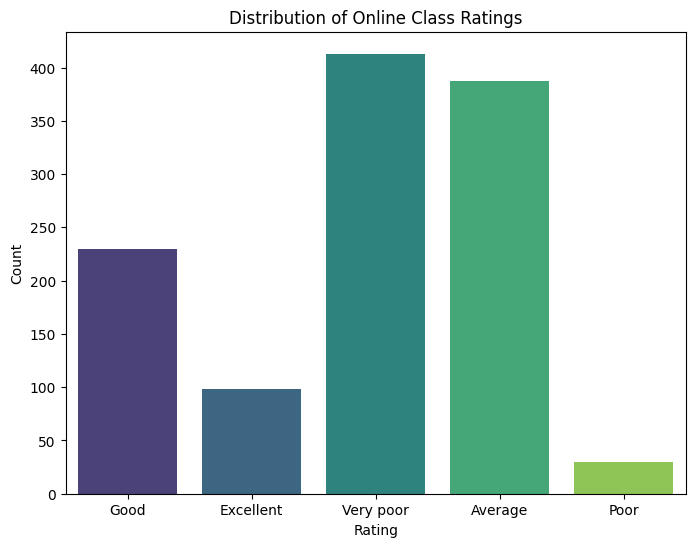

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating of Online Class experience', data=df, palette='viridis')
plt.title('Distribution of Online Class Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Average Time Spent on Various Activities: The bar chart compares the average time students spent on online classes, self-study, fitness, and social media, offering insights into their daily routines

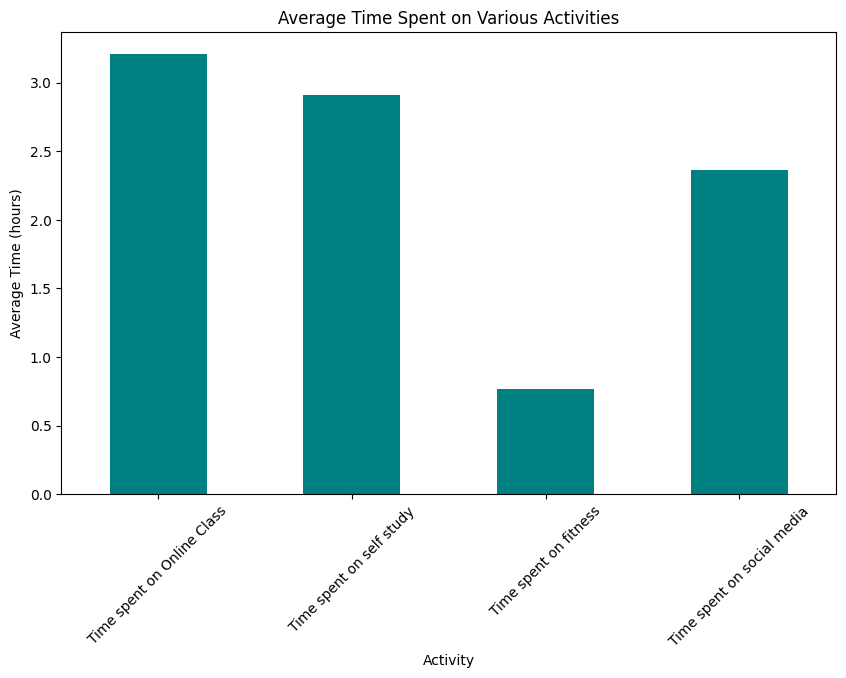

In [ ]:
activities = ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on social media']
average_times = df[activities].mean()
plt.figure(figsize=(10, 6))
average_times.plot(kind='bar', color='teal')
plt.title('Average Time Spent on Various Activities')
plt.xlabel('Activity')
plt.ylabel('Average Time (hours)')
plt.xticks(rotation=45)
plt.show()

Sleep Duration Analysis:The histogram displays the distribution of sleep duration among students, highlighting sleep patterns.

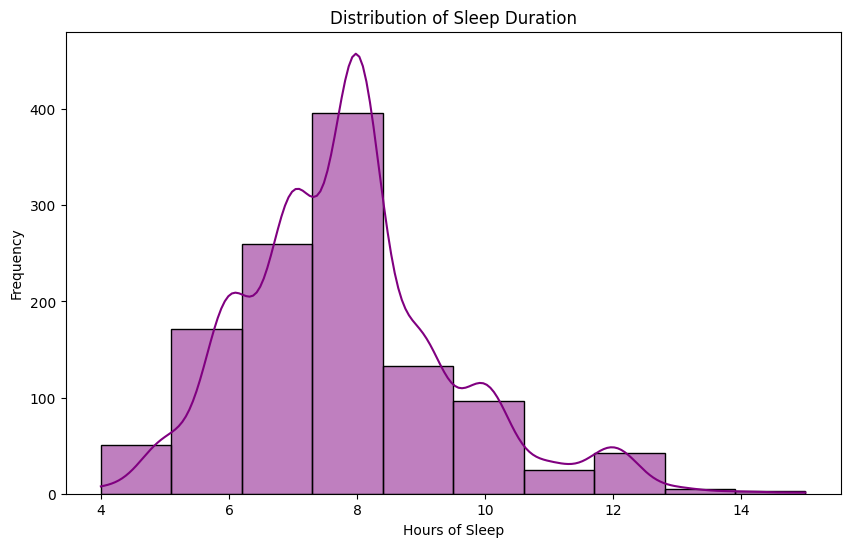

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time spent on sleep'], bins=10, kde=True, color='purple')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap:This heatmap shows the correlations between the time spent on various activities, helping to identify any strong relationships.

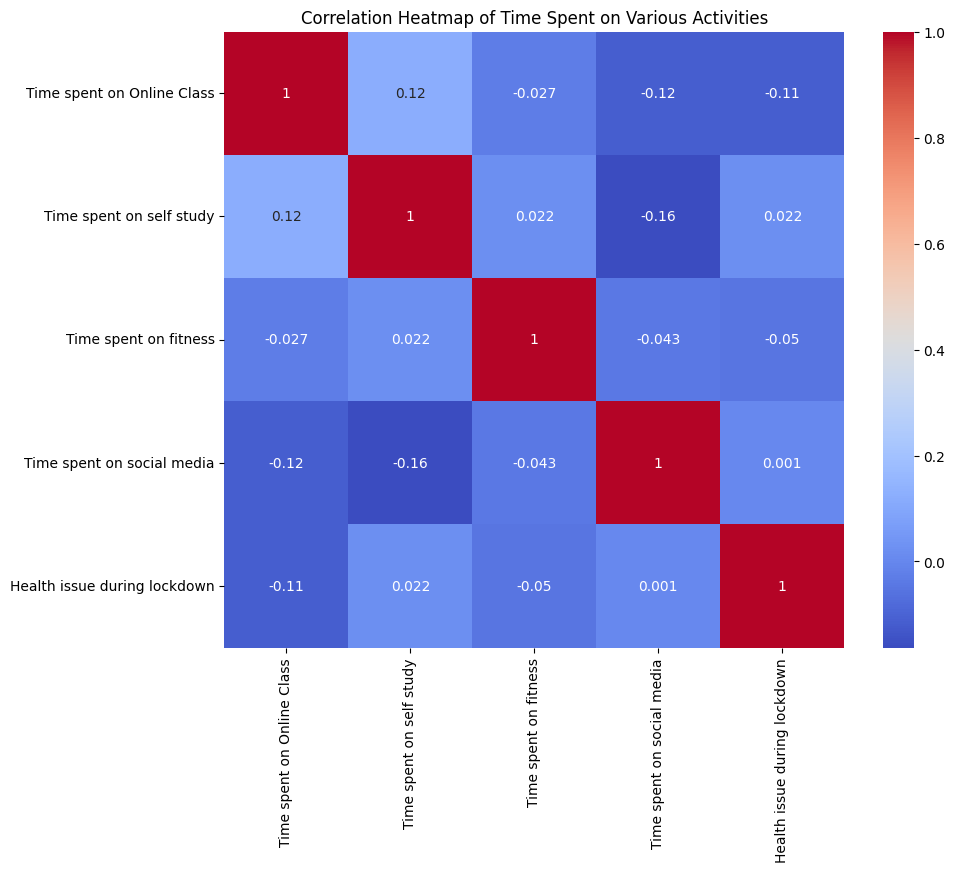

In [ ]:
correlation_matrix = df[activities + ['Health issue during lockdown']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Time Spent on Various Activities')
plt.show()

Comparison of Time Utilization: The count plot compares the number of students who effectively utilized their time against those who did not.

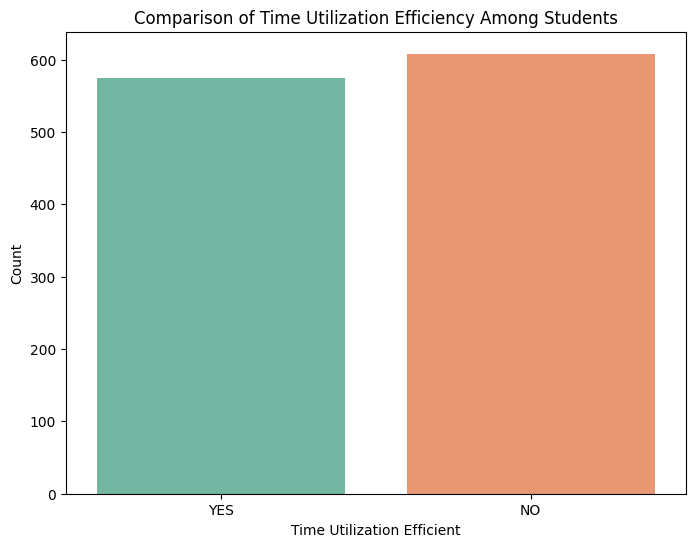

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time utilized', data=df, palette='Set2')
plt.title('Comparison of Time Utilization Efficiency Among Students')
plt.xlabel('Time Utilization Efficient')
plt.ylabel('Count')
plt.show()

Family Connection During Lockdown: The pie chart visualizes the proportion of students who felt more connected with their family during the lockdown, reflecting on their social experiences.

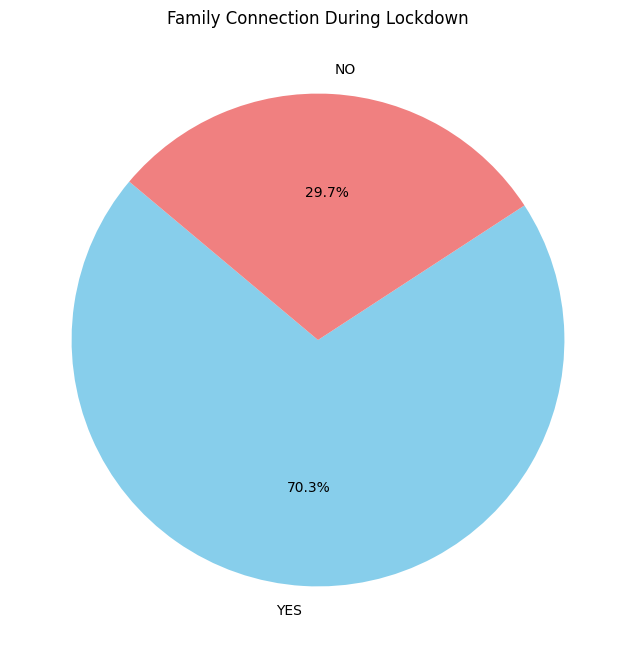

In [ ]:
family_connection_distribution = df['Do you find yourself more connected with your family, close friends , relatives  ?'].value_counts()

plt.figure(figsize=(8, 8))
family_connection_distribution.plot.pie(autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Family Connection During Lockdown')
plt.ylabel('')  # Hide the y-label
plt.show()

# Hypothesis Testing and Statistical Analysis

In [ ]:
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

Hypothesis 1 - Time Spent on Online Classes and Sleep Duration:

In [ ]:
correlation_coefficient, p_value_corr = pearsonr(df['Time spent on Online Class'], df['Time spent on sleep'])

Hypothesis 2 - Social Media Usage and Reported Health Issues:

In [ ]:
students_with_health_issues = df[df['Health issue during lockdown'] == 1]['Time spent on social media']
students_without_health_issues = df[df['Health issue during lockdown'] == 0]['Time spent on social media']
t_statistic, p_value_ttest = ttest_ind(students_with_health_issues, students_without_health_issues)

Hypothesis 3 - Effective Time Utilization and Family Connection:

In [ ]:
contingency_table = pd.crosstab(df['Time utilized'], df['Do you find yourself more connected with your family, close friends , relatives  ?'])
chi2, p_value_chi2, _, _ = chi2_contingency(contingency_table)

Print the results

In [ ]:
print("Pearson Correlation Coefficient (Hypothesis 1):", correlation_coefficient)
print("P-value (Hypothesis 1):", p_value_corr)
print("T-Statistic (Hypothesis 2):", t_statistic)
print("P-value (Hypothesis 2):", p_value_ttest)
print("Chi-Square Statistic (Hypothesis 3):", chi2)
print("P-value (Hypothesis 3):", p_value_chi2)

Pearson Correlation Coefficient (Hypothesis 1): -0.17778233524348003
P-value (Hypothesis 1): 7.516149522441335e-10
T-Statistic (Hypothesis 2): nan
P-value (Hypothesis 2): nan
Chi-Square Statistic (Hypothesis 3): 50.78747018599136
P-value (Hypothesis 3): 1.0292869654632776e-12


# Advance Analysis:Linear regression

Creating and Training the Model

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Selecting independent variables for the regression model

In [13]:
independent_vars = ['Time spent on Online Class', 'Time spent on self study', 'Time spent on fitness', 'Time spent on social media']
X = df[independent_vars].fillna(0)  # Handling NaN values by replacing them with 0
y = df['Time spent on sleep'].fillna(df['Time spent on sleep'].mean())  # Handling NaN values in dependent variable

Linear Regression Model

In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Output the coefficients and intercept

In [19]:
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.11664384 -0.1463724  -0.09427453  0.03158843]
Intercept: 8.669172068970939
